# Starter

In [ ]:
import pandas as pd

pd.set_option('display.max_column', 0)
df = pd.read_csv('data/art_of_chicago.csv').drop(['Unnamed: 0', 'source_updated_at', 'updated_at', 'timestamp'], axis=1)
df.head()

,id,api_link,title,alt_titles,thumbnail,main_reference_number,date_start,date_end,date_display,date_qualifier_title,artist_display,place_of_origin,description,short_description,dimensions,dimensions_detail,medium_display,credit_line,exhibition_history,provenance_text,fiscal_year,fiscal_year_deaccession,colorfulness,color,gallery_title,gallery_id,artwork_type_title,artwork_type_id,department_title,department_id,artist_id,artist_title,alt_artist_ids,artist_ids,artist_titles,category_ids,category_titles,term_titles,style_id,style_title,alt_style_ids,style_ids,style_titles,classification_id,classification_title,alt_classification_ids,classification_ids,classification_titles,subject_id,alt_subject_ids,subject_ids,subject_titles,material_id,alt_material_ids,material_ids,material_titles,technique_id,alt_technique_ids,technique_ids,technique_titles,theme_titles,image_id,alt_image_ids,document_ids,text_ids,section_ids,section_titles,site_ids
0,116936,https://api.artic.edu/api/v1/artworks/116936,Rapier,NaN,NaN,1982.3339,1500.0,1600.0,1500/1600,NaN,Italian or French,NaN,NaN,NaN,Overall: H.: 127 cm (50 in.),"[{'depth': None, 'width': None, 'height': 127,...","Steel, iron, lapis lazuli",NaN,NaN,NaN,1982.0,2007.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],[],[],[],[],"['edged weapon-sword', 'iron (metal)', 'metal'...",NaN,NaN,[],[],[],TM-1057,edged weapon-sword,"['TM-714', 'TM-351']","['TM-1057', 'TM-714', 'TM-351']","['edged weapon-sword', 'arms', 'arms and armor']",NaN,[],[],[],TM-2526,"['TM-2568', 'TM-2600', 'TM-2538', 'TM-2678']","['TM-2526', 'TM-2568', 'TM-2600', 'TM-2538', '...","['iron (metal)', 'metal', 'inorganic material'...",NaN,[],[],[],[],NaN,[],[],[],[],[],[]
1,57896,https://api.artic.edu/api/v1/artworks/57896,Panel (Design 506),NaN,"{'lqip': 'data:image/gif;base64,R0lGODlhBwAFAP...",1976.61n1,1955.0,1955.0,1955,Made,"Designed by Frank Lloyd Wright (American, 1867...",New York City,NaN,NaN,68.2 × 70.9 cm (26 3/4 × 27 7/8 in.),"[{'depth': None, 'width': 70, 'height': 68, 'd...","Cotton and nylon, plain weave",Purchased with funds provided by Mrs. Theodore...,NaN,NaN,NaN,NaN,41.8436,"{'h': 49, 'l': 50, 's': 64, 'percentage': 0.03...",NaN,NaN,Textile,5.0,Textiles,PC-14,37362.0,Frank Lloyd Wright,[],[37362],['Frank Lloyd Wright'],"['PC-14', 'PC-154']","['Textiles', 'Chicago Artists']","['Modernism', 'textile', 'weaving', 'decorativ...",TM-5981,Modernism,[],['TM-5981'],['Modernism'],TM-69,textile,"['TM-159', 'TM-1678']","['TM-69', 'TM-159', 'TM-1678']","['textile', 'weaving', 'decorative arts']",NaN,[],[],[],NaN,[],[],[],NaN,[],[],[],['Chicago Artists'],52b3cdf9-ef11-0ef5-f730-4a23550778cf,[],[],[],[],[],[]
2,127292,https://api.artic.edu/api/v1/artworks/127292,Nightrise,NaN,"{'lqip': 'data:image/gif;base64,R0lGODlhBgAFAP...",1943.2042,1935.0,1942.0,1935/42,NaN,"Ruth Chaney (American, 1908-1973)\npublished b...",United States,NaN,NaN,Image: 34.2 × 42.7 cm (13 1/2 × 16 13/16 in.);...,"[{'depth': None, 'width': 42, 'height': 34, 'd...",Color woodcut on off-white laid paper,"The Art Institute of Chicago, Works Progress A...",NaN,NaN,NaN,NaN,15.2193,"{'h': 340, 'l': 57, 's': 37, 'percentage': 0.0...",NaN,NaN,Drawing and Watercolor,14.0,Prints and Drawings,PC-13,44401.0,Ruth Chaney,[],[44401],['Ruth Chaney'],"['PC-825', 'PC-13']","['Women artists', 'Prints and Drawings']","['woodcut', 'paper (fiber product)', 'print', ...",NaN,NaN,[],[],[],TM-148,woodcut,"['TM-17', 'TM-4']","['TM-148', 'TM-17', 'TM-4']","['woodcut', 'print', 'prints and drawing']",NaN,[],[],[],TM-2982,[],['TM-2982'],['paper (fiber product)'],NaN,[],[],[],['Women artists'],cebf795f-ccdf-cfc5-a25e-613640ec7e32,[],[],[],[],[],[]
3,120557,https://api.artic.edu/api/v1/artworks/120557,River,NaN,"{'lqip': 'data:image/gif;base64,R0lGODlhCAAFAP...",1991.627,1975.0,1975.0,1975,Made,"Scott Hyde\nAmerican, born 1926",United States,NaN,NaN,Image: 12.7 × 20.3 cm (5 × 8 in.); Paper: 28.8...,"[{'depth': None, 'width': 20, 'height': 12, 'd...",Photolithograph,Gift of Arnold and Temmie Gi

# locations_time_df

In [2]:
location_time_df = df[['id', 'api_link', 'place_of_origin', 'date_display']]
location_time_df.head()

,id,api_link,place_of_origin,date_display
0,116936,https://api.artic.edu/api/v1/artworks/116936,NaN,1500/1600
1,57896,https://api.artic.edu/api/v1/artworks/57896,New York City,1955
2,127292,https://api.artic.edu/api/v1/artworks/127292,United States,1935/42
3,120557,https://api.artic.edu/api/v1/artworks/120557,United States,1975
4,3721,https://api.artic.edu/api/v1/artworks/3721,Belgium,1850/75


In [3]:
location_time_df['date_start'] = location_time_df['date_display'].str.split('/').str[0]
location_time_df['date_end'] = location_time_df['date_display'].str.split('/').str[1]

# Fill NaN values in date_end with values from date_start
location_time_df['date_end'] = location_time_df['date_end'].fillna(location_time_df['date_start'])

location_time_df.head()

/var/folders/x0/5z5dngvn6xsbn1w74_fh9z880000gn/T/ipykernel_66204/696109249.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  location_time_df['date_start'] = location_time_df['date_display'].str.split('/').str[0]
/var/folders/x0/5z5dngvn6xsbn1w74_fh9z880000gn/T/ipykernel_66204/696109249.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  location_time_df['date_end'] = location_time_df['date_display'].str.split('/').str[1]
/var/folders/x0/5z5dngvn6xsbn1w74_fh9z880000gn/T/ipykernel_66204/696109249.py:5: Set

,id,api_link,place_of_origin,date_display,date_start,date_end
0,116936,https://api.artic.edu/api/v1/artworks/116936,NaN,1500/1600,1500,1600
1,57896,https://api.artic.edu/api/v1/artworks/57896,New York City,1955,1955,1955
2,127292,https://api.artic.edu/api/v1/artworks/127292,United States,1935/42,1935,42
3,120557,https://api.artic.edu/api/v1/artworks/120557,United States,1975,1975,1975
4,3721,https://api.artic.edu/api/v1/artworks/3721,Belgium,1850/75,1850,75


In [4]:
def parse_date_end(row):
    start = str(row['date_start'])
    end = str(row['date_end'])
    if pd.isna(end) or end == 'nan':
        return start
    if len(end) == 2 and len(start) == 4:
        return start[:2] + end
    return end

location_time_df['date_start'] = location_time_df['date_display'].str.split('/').str[0]
location_time_df['date_end'] = location_time_df['date_display'].str.split('/').str[1]
location_time_df['date_end'] = location_time_df.apply(parse_date_end, axis=1)

/var/folders/x0/5z5dngvn6xsbn1w74_fh9z880000gn/T/ipykernel_66204/522330962.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  location_time_df['date_start'] = location_time_df['date_display'].str.split('/').str[0]
/var/folders/x0/5z5dngvn6xsbn1w74_fh9z880000gn/T/ipykernel_66204/522330962.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  location_time_df['date_end'] = location_time_df['date_display'].str.split('/').str[1]
/var/folders/x0/5z5dngvn6xsbn1w74_fh9z880000gn/T/ipykernel_66204/522330962.py:11: 

In [5]:
location_time_df.head()

,id,api_link,place_of_origin,date_display,date_start,date_end
0,116936,https://api.artic.edu/api/v1/artworks/116936,NaN,1500/1600,1500,1600
1,57896,https://api.artic.edu/api/v1/artworks/57896,New York City,1955,1955,1955
2,127292,https://api.artic.edu/api/v1/artworks/127292,United States,1935/42,1935,1942
3,120557,https://api.artic.edu/api/v1/artworks/120557,United States,1975,1975,1975
4,3721,https://api.artic.edu/api/v1/artworks/3721,Belgium,1850/75,1850,1875


In [25]:
location_time_df.to_csv('locations_time.csv')

# Create Geo Graphs

## Preparing Lookups

In [1]:
import pandas as pd

pd.set_option('display.max_column', 0)
locations_df = pd.read_csv('data/locations_df.csv').drop(['Unnamed: 0'], axis=1)
locations_df.head()

,place_of_origin
0,NaN
1,New York City
2,United States
3,United States
4,Belgium


In [2]:
print(locations_df['place_of_origin'].nunique())
locations_df = locations_df.dropna(subset=['place_of_origin'])

print(locations_df.shape)

all_locations = locations_df['place_of_origin'].unique()
all_locations

1489
(124454, 1)


array(['New York City', 'United States', 'Belgium', ..., 'Captiva',
       'Chiang Mai province', 'Hokkaido region'], dtype=object)

In [3]:
import pycountry

# Build a list of standard country names
countries = [country.name for country in pycountry.countries]  # type: ignore

In [4]:
import json
with open('location_country_mappings.json', 'r') as f:
    locations_mapping = json.load(f)

locations_mapping

{'United States': 'United States',
 'Belgium': 'Belgium',
 'Santa Valley': 'Peru',
 'Switzerland': 'Switzerland',
 'France': 'France',
 'China': 'China',
 'Egypt': 'Egypt',
 'Germany': 'Germany',
 'Japan': 'Japan',
 'Prague': 'Czechia',
 'England': 'United Kingdom',
 'Unknown Place': 'Unknown',
 'Canada': 'Canada',
 'Minnesota': 'United States',
 'Sweden': 'Sweden',
 'Netherlands': 'Netherlands',
 'Russia': 'Russian Federation',
 'Spain': 'Spain',
 'United Kingdom': 'United Kingdom',
 'Holland': 'Netherlands',
 'Thessalía': 'Greece',
 'Birmingham': 'United Kingdom',
 'Italy': 'Italy',
 'London': 'United Kingdom',
 'Greece': 'Greece',
 'Peruvian North Coast': 'Peru',
 'Winnetka': 'United States',
 'Southern Germany': 'Germany',
 'Michigan Avenue, 360 North': 'United States',
 'Bohemia': 'Czechia',
 'Chicago': 'United States',
 'Mexico': 'Mexico',
 'Worcester': 'United Kingdom',
 'South Africa': 'South Africa',
 'Roman Empire': 'Italy',
 'Syria': 'Syrian Arab Republic',
 'Sèvres': 'Franc

In [5]:
rows = []
for name in locations_df['place_of_origin']:
    target = locations_mapping.get(name, name)
    if isinstance(target, list):
        for t in target:
            rows.append(dict(raw_name=name, lookup=t))
    else:
        rows.append(dict(raw_name=name, lookup=target))

geo_df = pd.DataFrame(rows)
geo_df.head()

,raw_name,lookup
0,New York City,United States
1,United States,United States
2,United States,United States
3,Belgium,Belgium
4,Santa Valley,Peru


In [6]:
geo_df['lookup'].nunique()

149

## Visualise

In [7]:
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
import folium
import geopandas as gpd

In [ ]:
# geolocator = Nominatim(user_agent="Geopy Library")

# def try_geocode(place):
#     try:
#         loc = geolocator.geocode(place)
#         return (loc.latitude, loc.longitude) if loc else (None, None)
#     except Exception:
#         return (None, None)

# locations[['lat', 'lon']] = locations['location'].apply(lambda x: pd.Series(try_geocode(x)))

In [ ]:
locations = pd.read_csv('data/locations.csv').drop('Unnamed: 0', axis=1)
locations.head()

,location,lat,lon
0,United States,39.783730,-100.445882
1,Belgium,50.640281,4.666715
2,Peru,-6.869970,-75.045851
3,Switzerland,46.798562,8.231974
4,France,46.603354,1.888334


In [10]:
locations.loc[locations['location'] == 'Georgia']

,location,lat,lon
44,Georgia,42.3154,43.3569


In [11]:
geo_df = geo_df.merge(
    locations[['location', 'lat', 'lon']],
    how='left',
    left_on='lookup',
    right_on='location'
).drop(columns='location')

geo_df.head()

,raw_name,lookup,lat,lon
0,New York City,United States,39.783730,-100.445882
1,United States,United States,39.783730,-100.445882
2,United States,United States,39.783730,-100.445882
3,Belgium,Belgium,50.640281,4.666715
4,Santa Valley,Peru,-6.869970,-75.045851


In [12]:
# Center map roughly on the world
m = folium.Map(location=[20, 0], zoom_start=2, tiles='CartoDB positron')

for _, row in locations.dropna(subset=['lat', 'lon']).iterrows():
    folium.CircleMarker(
        location=[row['lat'], row['lon']],
        radius=4,
        color='darkblue',
        fill=True,
        fill_opacity=0.7,
        # popup=row['raw_name']
    ).add_to(m)

# Save to HTML
m.save('unique_countries_map.html')

In [13]:
locations.loc[locations['location'] == 'United States', ['location']] = 'United States of America'
locations.loc[locations['location'] == 'United States of America']

,location,lat,lon
0,United States of America,39.78373,-100.445882


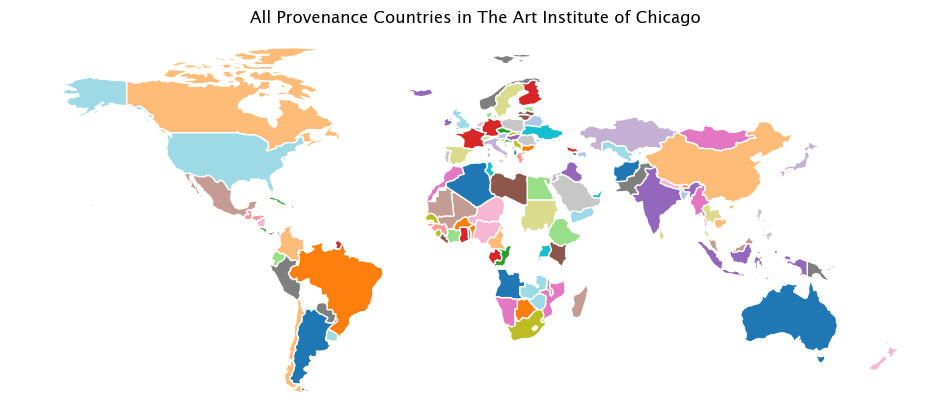

In [15]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Load world shapefile
world = gpd.read_file("geopandas/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp")

# Example provenance DataFrame
# locations = pd.DataFrame({"location": ["France", "China", "United States"]})

# Standardise case/spacing for consistent merging
world["NAME"] = world["NAME"].str.strip().str.lower()
locations["location"] = locations["location"].str.strip().str.lower()

# Keep only provenance countries
merged = world.merge(locations, left_on="NAME", right_on="location", how="inner")

# Plot only provenance countries
fig, ax = plt.subplots(figsize=(12, 6))
merged.plot(
    ax=ax,
    column="location",   # colour by country
    categorical=True,
    cmap="tab20",
    legend=False,
    edgecolor="white"
)

ax.set_title("All Provenance Countries in The Art Institute of Chicago")
ax.set_axis_off()
plt.show()

# Create Country Concentration Map

In [26]:
from folium.plugins import HeatMap

In [22]:
locations = pd.read_csv('data/locations.csv').drop('Unnamed: 0', axis=1)
locations.head()

,location,lat,lon
0,United States,39.783730,-100.445882
1,Belgium,50.640281,4.666715
2,Peru,-6.869970,-75.045851
3,Switzerland,46.798562,8.231974
4,France,46.603354,1.888334


In [23]:
print(f"Dataset's Shape: {geo_df.shape}")
print(f"Locations Shape: {locations.shape}")

Dataset's Shape: (124454, 4)
Locations Shape: (149, 3)


In [24]:
geo_df.head()

,raw_name,lookup,lat,lon
0,New York City,United States,39.783730,-100.445882
1,United States,United States,39.783730,-100.445882
2,United States,United States,39.783730,-100.445882
3,Belgium,Belgium,50.640281,4.666715
4,Santa Valley,Peru,-6.869970,-75.045851


In [33]:
# Get count of each country in geo_df['lookup']
country_counts = geo_df['lookup'].value_counts()

# Map the counts to the locations DataFrame (countries that don't exist will get 0)
locations = locations.dropna(subset=['lat', 'lon']).copy()
locations['count'] = locations['location'].map(country_counts).fillna(0).astype(int)

heat_data = [
    [row['lat'], row['lon'], row['count']]
    for _, row in locations.iterrows()
]
heat_data

[[39.7837304, -100.445882, 44702],
 [50.6402809, 4.6667145, 1537],
 [-6.8699697, -75.0458515, 1528],
 [46.7985624, 8.2319736, 617],
 [46.603354, 1.8883335, 16571],
 [35.000074, 104.999927, 4194],
 [26.2540493, 29.2675469, 1269],
 [51.1638175, 10.4478313, 5173],
 [36.5748441, 139.2394179, 13992],
 [49.7439047, 15.3381061, 632],
 [54.7023545, -3.2765753, 11553],
 [26.492533, 92.3308789, 1264],
 [61.0666922, -107.991707, 494],
 [59.6749712, 14.5208584, 744],
 [64.6863136, 97.7453061, 566],
 [39.3260685, -4.8379791, 1382],
 [42.6384261, 12.674297, 6576],
 [23.6585116, -102.0077097, 1363],
 [-28.8166236, 24.991639, 252],
 [63.2467777, 25.9209164, 75],
 [55.670249, 10.3333283, 128],
 [-2.4833826, 117.8902853, 243],
 [39.294076, 35.2316631, 445],
 [7.9897371, -5.5679458, 48],
 [28.3780464, 83.9999901, 83],
 [1.4419683, 38.4313975, 38],
 [28.3347722, -10.3713379, 74],
 [49.4871968, 31.2718321, 33],
 [47.59397, 14.12456, 596],
 [23.0131338, -80.8328748, 32],
 [32.6475314, 54.5643516, 302],
 [61

In [34]:
# Create a base map
m = folium.Map(location=[20, 0], zoom_start=2)

HeatMap(heat_data, radius=15).add_to(m)

# Add a legend using a color scale (via branca)
import branca.colormap as cm

max_count = locations['count'].max()
min_count = locations['count'].min()

colormap = cm.LinearColormap(
    colors=['lightblue', 'green', 'yellow', 'red'],
    vmin=min_count,
    vmax=max_count,
    caption='Country Count Intensity'
)

colormap.add_to(m)

# Save or display the map
m.save("country_concentration_map.html")